In [240]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [241]:
# Extracción de datos

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        #print(elementos)
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])

H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])

-38.47008083837284 -888.2680384348085 -539.7938837826994
-113.88076565486222 877.2320792208022 727.3612354694883
-646.2419141916776 684.6111834612964 272.96788929458853
506.3312328947911 969.2787186316702 -216.14497876988787
626.7759635568364 138.92917220223444 -950.1687784368224
-430.1026823230935 71.16630786838141 549.1498813031169
-753.2821778063305 -306.03624521346956 17.476075029970502
545.5326427875284 281.01345248044686 646.0505510192188
-461.0411828089957 -786.6656513103087 38.45835610449035
983.2734091729196 750.5121153778916 -121.71789395260907
-75.75452651845558 -61.16597191272683 359.8210138757813
677.5812938909385 753.9487164917564 -702.2391099768704
257.4944396100391 -560.1769480681467 -761.8373434024884
877.457102506921 419.3882118186318 -226.87836018674852
-927.3191229154776 -369.03866814013054 530.0049621211115
-731.0526913757085 -114.62899148020142 994.1659628012076
608.8701290557794 -274.19423165983176 596.1772119463353
880.5299397928513 -658.1013576919095 680.215138

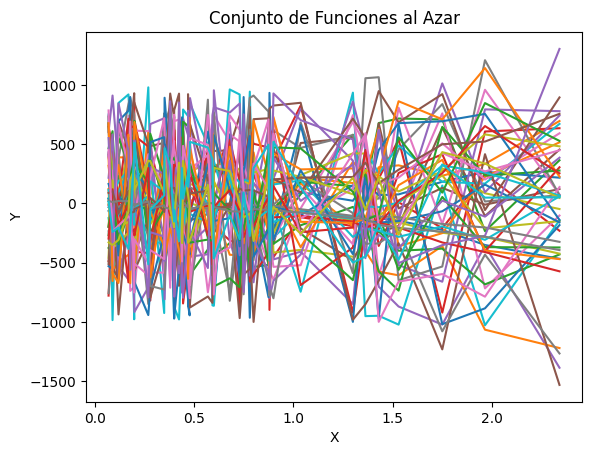

In [242]:
# Conjunto funciones

def generar_funcion_azar(x):
    a = np.random.uniform(-1000, 1000)
    b = np.random.uniform(-1000, 1000)
    c = np.random.uniform(-1000, 1000)
    print(a, b, c)
    
    funcion = a * np.sin(b * x) + c * np.exp(-0.5 * (x - 3)**2) + 0.5 * x**2
    
    return funcion

num_funciones = 50
conjunto_funciones = np.array([generar_funcion_azar(z) for _ in range(num_funciones)])

for i, funcion in enumerate(conjunto_funciones):
    plt.plot(z, funcion, label=f'Función {i + 1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Funciones al Azar')
plt.show()


47


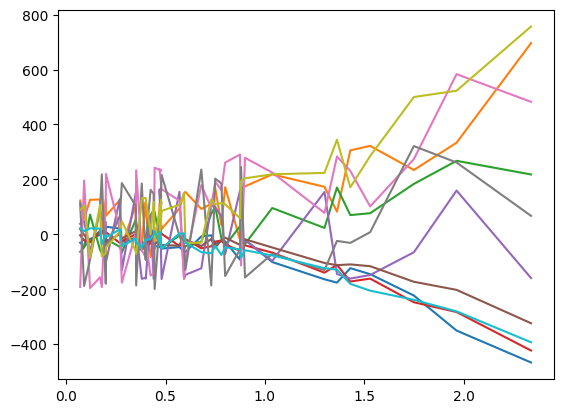

In [243]:
chi = np.zeros(len(conjunto_funciones))

for i in range(len(conjunto_funciones)): 
    funcion = conjunto_funciones[i]
    chi[i] = np.sum(((H - funcion) / desv)**2)

percentil_20 = np.percentile(chi, 20)

chi_menor_20 = [num for num in chi if num <= percentil_20]
indices_menor_20 = np.where(np.array(chi) <= percentil_20)[0]
print(max(indices_menor_20))


primeras_funciones = conjunto_funciones[indices_menor_20.tolist()]
for i, funcion in enumerate(primeras_funciones):
    plt.plot(z, funcion, label=f'Función {i + 1}')



In [246]:
# Se define combinacion

def combinar_al_azar(F):
    Combinacion = np.zeros_like(F)
    for i in range(0, len(F)): 
        rand = np.random.rand()
        indice = random.randint(0, len(F))
        print(i)

        if rand < 0.25:
            Combinacion[i] = F[i] + F[indice]
        elif 0.25< rand < 0.5:
            Combinacion[i] = (F[i] * F[indice])
        elif 0.5  < rand < 0.75:
            Combinacion[i] = (F[i] - F[indice])
        else:
            Combinacion[i] = (F[i]/F[indice])
    return Combinacion
    
# Se combinan funciones pre-existentes

combinacion = combinar_al_azar(primeras_funciones)
print(len(combinacion))

for i, funcion in enumerate(combinacion):
    plt.plot(z, funcion, label=f'Función {i + 1}')

0


IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
# Se define mutacion


tamanio_nueva_lista = int(len(combinacion) * 0.1)

# Crear una nueva lista con el 10% de los elementos al azar
percentil_10 = random.sample(combinacion.tolist(), tamanio_nueva_lista)

print(percentil_10)

def mutar_al_azar(F):
    Mutacion = np.zeros_like(F)
    for i in range(0, len(F)): 
        rand = np.random.rand()
        exponencial = np.random.rand()
        A = np.random.rand()

        
        if rand < 0.25:
            Mutacion[i] = A*F[i]**exponencial
        elif 0.25< rand < 0.5:
            Mutacion[i] = A*np.log(F[i])
        elif 0.5  < rand < 0.75:
            Mutacion[i] = A*np.sin(F[i])
        else:
            Mutacion[i] = A*np.cos(F[i])
    return Mutacion



[]
